In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import scipy.stats as stat
from scipy import asarray as ar,exp

T=300
kb=1.38064852*10**(-23)
Na=6.02214e23

def gaussian(x,a,b,c):
    func=a*exp(-(x-b)**2/(2*c**2))
    return(func)

def gaus(x,a,x0,sigma):
    
    return(a*exp(-(x-x0)**2/(2*sigma**2)))

def making_me_bonds(bond,direct):
    data1=pd.read_csv(direct+'/bonds2_' +bond+'.xvg',skiprows=13,delim_whitespace=True, names=["bond","frequency"])
    num=sum(data1['frequency'])
    x= data1['bond']
    y=data1['frequency']/num
    x0 = sum((x)*(y))                  
    sigma = (sum(y*(x-x0)**2))**0.5
    print('mean=  ',x0)
    print('sigma= ',sigma)
    popt,pcov = curve_fit(gaus,x,y,p0=[1,x0,sigma])

    plt.plot(x,y,'b+:',label='data')
    plt.plot(x,gaus(x,*popt),'ro:',label='fit')
    plt.legend()
    plt.xlabel('bond of ' +str(bond))
    plt.ylabel('Frequency')
    plt.show()
    
    y_fits=gaussian(x,popt[0],popt[1],popt[2])
    std=np.std([x,y_fits])
    force_const=kb*T*Na/((std**2))
    print('force constant= ',force_const)
    
def making_me_angles(angle,direct,unit):
    data=pd.read_csv(direct+'/angdist2_' +angle+'.xvg',skiprows=13,delim_whitespace=True, names=["Angle","frequency"])
    if unit == 'radians' or unit == 'r':
        x= data['Angle']/57.296
        units=' (radians)'
    else:
        x= data['Angle']
        units=' (degrees)'
    y=data['frequency']

    n = len(data["Angle"])+1
    x0 = sum((x)*(data["frequency"]))
    sigma = sum(y*(x-x0)**2)
    print('mean=  ',x0)
    print('sigma= ',sigma)
    popt,pcov = curve_fit(gaus,x,y,p0=[1,x0,sigma])

    plt.plot(x,y,'b+:',label='data')
    plt.plot(x,gaus(x,*popt),'ro:',label='fit')
    plt.legend()
    plt.xlabel('Angle of '+angle+units)
    plt.ylabel('Frequency')
    plt.show()

    y_fits=gaussian(x,popt[0],popt[1],popt[2])
    std=np.std([x,y_fits])
    force_const=kb*T*Na/((std**2))
    print('force constant= ',force_const)

## If you want to watch the simulation on hyak:
cd /suppscr/pfaendtner/gdavids3/research/PEG_parametrization/triazine/AA/my_first_sim

vmd frame1.gro trajpbc.xtc



But I can say that it did not look like they interacted in any meaningful or noticeable way.

# Checking non-bonded parameters

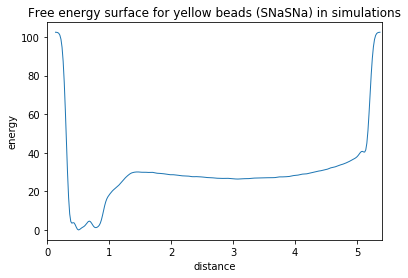

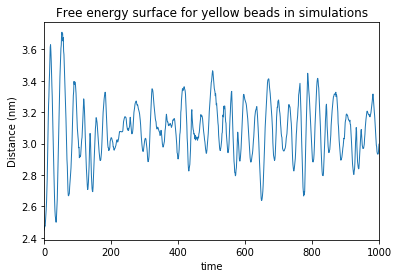

Mean distance of molecules from each other:  3.08080039461


In [30]:
data1=pd.read_csv('files/fes6.dat',skiprows=5,names=['distance','energy','error'],delim_whitespace=True)
#plt.figure(figsize=(10,7))
plt.plot(data1['distance'],data1['energy'], lw=1)
plt.xlabel('distance')
plt.ylabel('energy')
plt.title('Free energy surface for yellow beads (SNaSNa) in simulations')
plt.xlim([0,5.4])
plt.show()

data2=pd.read_csv('files/DISTANCES_1sim',delim_whitespace=True,header=0,skipinitialspace=True)
plt.plot(data2['time'],data2['d_SNaSNa_1'], lw=1)
plt.xlabel('time')
plt.ylabel('Distance (nm)')
plt.title('Free energy surface for yellow beads in simulations')
plt.xlim([0,1000])
plt.show()
print('Mean distance of molecules from each other: ', np.mean(data2['d_SNaSNa_1']))

The average distance between the SNaSNa beads (the ring bead of each molecule) is just above 3nm. However, the metadynamis would predict it to be somewhere below 1nm.

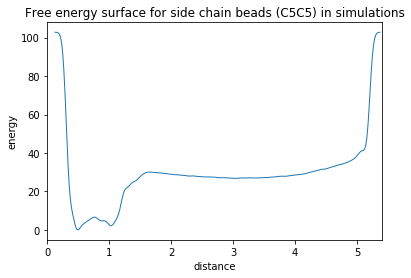

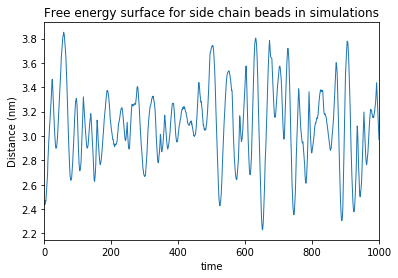

Mean distance of molecules from each other:  3.08820808092


In [31]:
data1=pd.read_csv('files/fes9.dat',skiprows=5,names=['distance','energy','error'],delim_whitespace=True)
#plt.figure(figsize=(10,7))
plt.plot(data1['distance'],data1['energy'], lw=1)
plt.xlabel('distance')
plt.ylabel('energy')
plt.title('Free energy surface for side chain beads (C5C5) in simulations')
plt.xlim([0,5.4])
plt.show()

data2=pd.read_csv('files/DISTANCES_1sim',delim_whitespace=True,header=0,skipinitialspace=True)
plt.plot(data2['time'],data2['d_C5C5_1'], lw=1)
plt.xlabel('time')
plt.ylabel('Distance (nm)')
plt.title('Free energy surface for side chain beads in simulations')
plt.xlim([0,1000])
plt.show()
print('Mean distance of molecules from each other: ', np.mean(data2['d_C5C5_1']))

# Checking bonded parameters
### BONDS

The top graph after each entry are the bond lengths between the _mapped_ beads (i.e. what I want to ideally replicate).

The bottom graph after each entry are the ones I got from running a simulation with all my newly defined parameters.

mean=   0.311080591092
sigma=  0.00399046704003


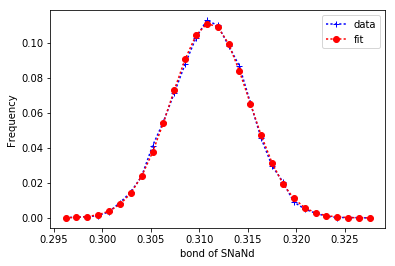

force constant=  124444.403052

 SIMULATION

mean=   0.311241398941
sigma=  0.00449647759772


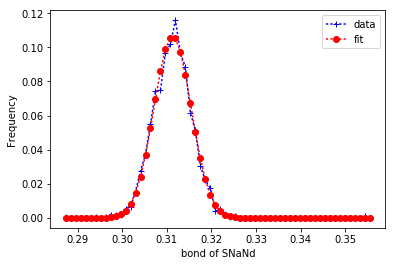

force constant=  103958.48042


In [26]:
making_me_bonds('SNaNd','files')
print('\n SIMULATION\n')
making_me_bonds('SNaNd','xvgsfirst')

mean=   0.309234662519
sigma=  0.00659388861328


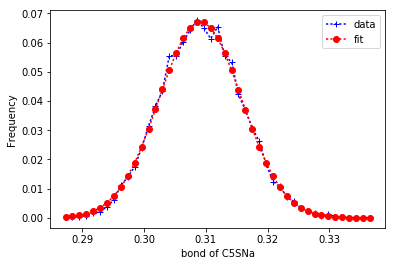

force constant=  116806.037298

 SIMULATION

mean=   0.309396364225
sigma=  0.0055865930597


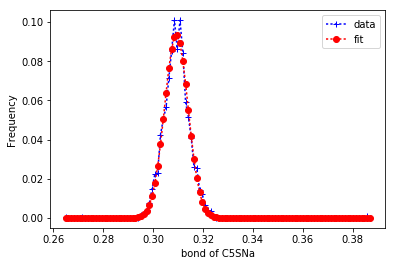

force constant=  95916.7404523


In [27]:
making_me_bonds('C5SNa','files')
print('\n SIMULATION\n')
making_me_bonds('C5SNa','xvgsfirst')

mean=   0.252896709228
sigma=  0.00451869565139


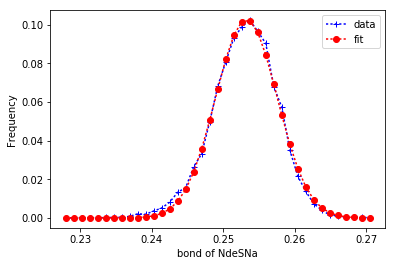

force constant=  188938.256345

 SIMULATION

mean=   0.253013146768
sigma=  0.00358957246748


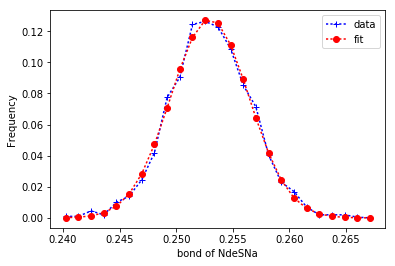

force constant=  199742.938608


In [28]:
making_me_bonds('NdeSNa','files')
print('\n SIMULATION\n')
making_me_bonds('NdeSNa','xvgsfirst')

### ANGLES

mean=   110.704327
sigma=  11.666903581


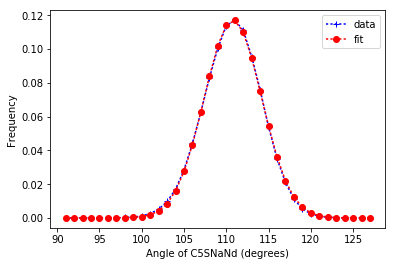

force constant=  0.824361939837

 SIMULATION

mean=   110.965967
sigma=  4.51292053824


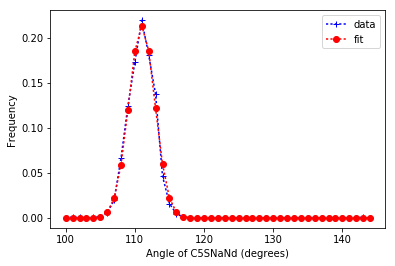

force constant=  0.655719161538


In [23]:
making_me_angles('C5SNaNd','files','d')
print('\n SIMULATION\n')
making_me_angles('C5SNaNd','xvgsfirst','d')

mean=   124.912127
sigma=  6.8967162964


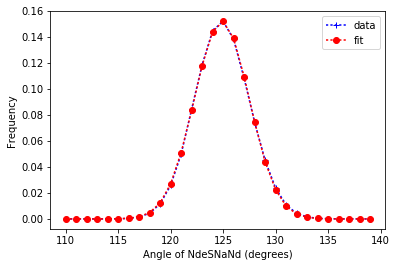

force constant=  0.637864816002

 SIMULATION

mean=   125.200689
sigma=  4.25527856286


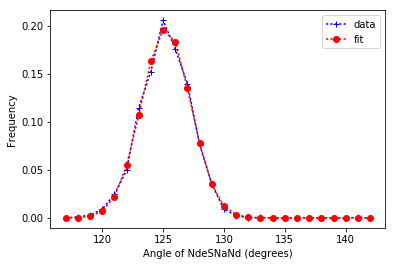

force constant=  0.591327142642


In [24]:
making_me_angles('NdeSNaNd','files','d')
print('\n SIMULATION\n')
making_me_angles('NdeSNaNd','xvgsfirst','d')

mean=   116.830739
sigma=  12.4011648707


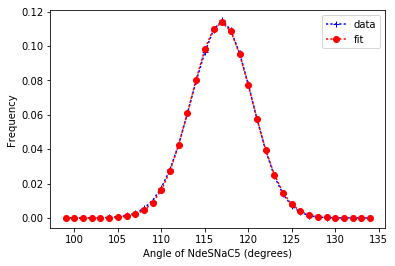

force constant=  0.723960421892

 SIMULATION

mean=   117.103017
sigma=  4.2102176143


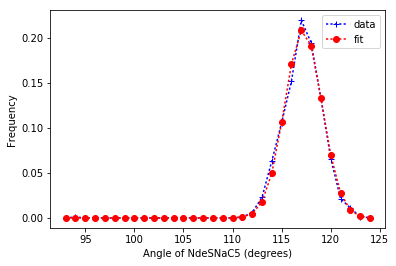

force constant=  0.835902020817


In [25]:
making_me_angles('NdeSNaC5','files','d')
print('\n SIMULATION\n')
making_me_angles('NdeSNaC5','xvgsfirst','d')